## Caso de análisis:
La concesionaria AutoFlex, donde trabajamos como parte de una célula Data Science, está preocupada por la aceptación de la nueva versión de su marca estrella. Se han recibido muchos comentarios en redes sociales al respecto, y claramente se quiere optimizar el costo de procesamiento de esas opiniones. Para ello, desea interpretar esos comentarios utilizando el preprocesamiento de texto e implementar un modelo para resumir las opiniones de manera automática. El equipo de trabajo propone realizar un análisis de sentimientos que clasifique cada texto escrito, ya que la gerencia comercial tiene un conjunto de comentarios clasificados como “bueno”, “malo” o “info” (necesita más información). Debemos realizar, primero, una descarga de la base, y terminar de sustentar metodológicamente el proyecto.

## Consignas

1. En primer lugar, debemos sustentar metodológicamente:

a. ¿Qué tipo de aplicación es un análisis de sentimientos? Por favor, en un párrafo de no más 6 líneas, explique en qué consiste, de manera que la gerencia de analítica lo comprenda fácilmente.

Respuesta:
El análisis de sentimientos es una aplicación de procesamiento del lenguaje natural que identifica y clasifica las emociones expresadas en textos como positivos, negativos o neutrales. Utiliza algoritmos de aprendizaje automático y técnicas lingüísticas para evaluar opiniones de clientes en redes sociales, encuestas y reseñas, proporcionando a la gerencia de analítica información valiosa sobre las percepciones de los usuarios para apoyar la toma de decisiones.

b. ¿Qué tipo de procesamiento es necesario realizar primero? Exponga en un dibujo los pasos que va a realizar sobre los comentarios con el fin de convertirlos en data estructurada.

Respuesta:
detallo los pasos:
1.   Recolección de Datos
2.   Preprocesamiento de Texto
3.   Limpieza de Datos
4.   Tokenización
5.   Normalización
6.   Eliminación de Palabras Irrelevantes
7.   Etiquetado de Partes del Discurso
8.   Extracción de Características
9.   Análisis de Sentimientos y Clasificación






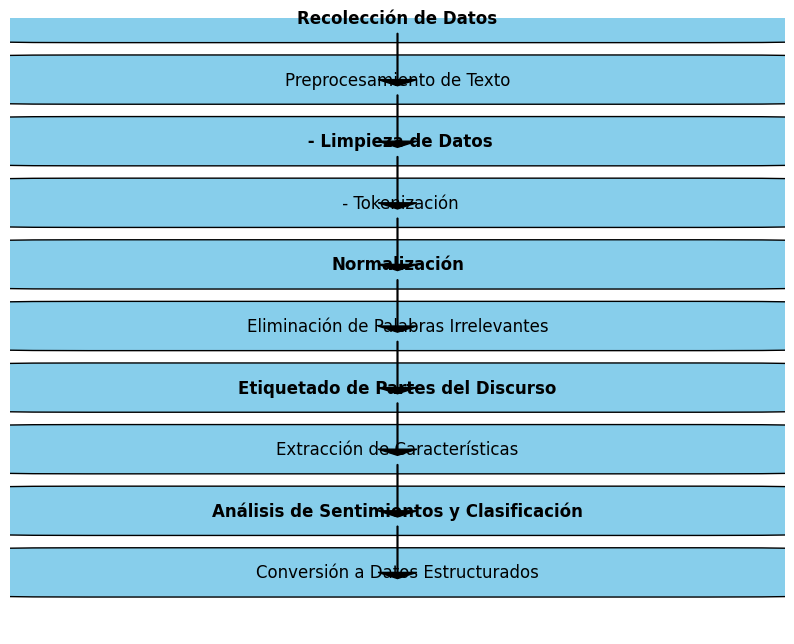

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Define the steps
steps = [
    "Recolección de Datos",
    "Preprocesamiento de Texto",
    " - Limpieza de Datos",
    " - Tokenización",
    "Normalización",
    "Eliminación de Palabras Irrelevantes",
    "Etiquetado de Partes del Discurso",
    "Extracción de Características",
    "Análisis de Sentimientos y Clasificación",
    "Conversión a Datos Estructurados"
]

# Define y positions for each step
y_positions = list(range(len(steps) * 2, 0, -2))

# Add rectangles for each step
for i, (step, y) in enumerate(zip(steps, y_positions)):
    ax.add_patch(patches.FancyBboxPatch((0.1, y-0.5), 0.8, 1, boxstyle="round,pad=0.3", edgecolor='black', facecolor='skyblue'))
    ax.text(0.5, y, step, ha='center', va='center', fontsize=12, weight='bold' if i%2==0 else 'normal')

# Add arrows
for i in range(len(steps)-1):
    ax.arrow(0.5, y_positions[i] - 0.5, 0, -1.5, head_width=0.05, head_length=0.2, fc='black', ec='black')

# Set limits and hide axes
ax.set_xlim(0, 1)
ax.set_ylim(0, len(steps) * 2)
ax.axis('off')

# Show the plot
plt.show()


## instalar paquetes

In [2]:
!pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 965.8 kB/s eta 0:00:00


Cargar Variables

In [3]:
import pandas as pd
import numpy as np
import category_encoders as ce


2.	La gerencia de marketing le ha entregado una tabla con diferentes comentarios de los clientes, la cual se llama “comentarios.csv”. Primeramente, realice una lectura de los datos. Para ello, use el método read_csv en vez de read_table; utilice como separador la coma (,). Indique cuántos registros tiene la tabla y cuántas columnas; visualice los 20 primeros registros.

In [5]:
df = pd.read_csv("/content/comentarios.csv", sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   orden       600 non-null    int64 
 1   comentario  600 non-null    object
 2   tipo        600 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


## Analisis de la carga de datos
se obtuvo un dataframe con 600 entradas y 3 columnas, con porcentajes de tipo dde comentarios clasificados como bueno, malo, info

In [7]:
display(df)

,orden,comentario,tipo
0,1,"No les creo nada ,",malo
1,2,Está bonita la camioneta,bueno
2,3,Quiero más información,info
3,4,:( igual el crédito ha de ser muuuucho,malo
4,5,"Quisiera, más información, pero nadie me respo...",info
...,...,...,...
595,596,piezas de respuestos escasas y demoran mucho e...,malo
596,597,No sube muy bien las pendientes,malo
597,598,es la mejor SUV que he tenido,bueno
598,599,el crédito directo resulta muy caro,malo


from matplotlib import pyplot as plt
df['orden'].plot(kind='hist', bins=20, title='orden')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('tipo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['orden']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'orden'}, axis=1)
              .sort_values('orden', ascending=True))
  xs = counted['orden']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('orden', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tipo')):
  _plot_series(series, series_name, i)
  fig.legend(title='tipo', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('orden')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['orden'].plot(kind='line', figsize=(8, 4), title='orden')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['tipo'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='orden', y='tipo', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
df.head(20)

,orden,comentario,tipo
0,1,"No les creo nada ,",malo
1,2,Está bonita la camioneta,bueno
2,3,Quiero más información,info
3,4,:( igual el crédito ha de ser muuuucho,malo
4,5,"Quisiera, más información, pero nadie me respo...",info
5,6,"cuota chica, pero digan la última cuota, de se...",malo
6,7,"Yo tengo uno claro la versión anterior ,,me ha...",bueno
7,8,"No lo compres, son fabricados en méxico",malo
8,9,"🥰❤❣💯, amo esta marca",bueno
9,10,más IVA? Ni que la weá la uses como camioneta,malo


from matplotlib import pyplot as plt
_df_0['orden'].plot(kind='hist', bins=20, title='orden')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('tipo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['orden']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'orden'}, axis=1)
              .sort_values('orden', ascending=True))
  xs = counted['orden']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('orden', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tipo')):
  _plot_series(series, series_name, i)
  fig.legend(title='tipo', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('orden')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['orden'].plot(kind='line', figsize=(8, 4), title='orden')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['tipo'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='orden', y='tipo', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

3.	Realice un análisis exploratorio de esta data encontrando el porcentaje de tipo de comentarios que han sido clasificados como malos, buenos o información, aplique el código Python que considere necesario y exprese el resultado en una tabla.

Res: Obtenemos las frecuencias relativas

In [8]:
df['tipo'].value_counts(normalize=True)*100


tipo
malo     45.0
bueno    37.0
info     18.0
Name: proportion, dtype: float64

4.	Diseñe un patrón de expresión regular para utilizarlo como tokenizador más adelante, que además de las palabras en idioma español, lea los emojis como 🥰❤. También considere la expresión como “:)” como un solo token, pero que excluya la puntuación punto “.”, coma “,” y punto y coma “;”.

In [9]:
import re
text = "vi viene última . ffff , ❤🥰 :) "
re.findall('[^\\s^,^.^;]+', text)

['vi', 'viene', 'última', 'ffff', '❤🥰', ':)']

5.	Defina el conjunto X como los comentarios del data frame, y el target, y como la columna tipo.

In [14]:
x=df['comentario']
y=df['tipo']


In [15]:
print()